In [2]:
import torch
import pandas as pd
import numpy as np
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay,precision_recall_curve, auc
from imblearn.over_sampling import SMOTE, BorderlineSMOTE,ADASYN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,make_scorer


In [ ]:
df = pd.read_csv(f"D:\機器學習 碩一\期末專題\creditcard.csv")

print(df.head())

df.drop('Time', axis = 1, inplace = True)

print(df.head())

from sklearn.preprocessing import MinMaxScaler

# 初始化 MinMaxScaler，將數據壓縮到 [0, 1]
scaler = MinMaxScaler()

# 提取 'Amount' 欄位並進行 Min-Max Scaling
amount = df['Amount'].values.reshape(-1, 1)  
scaled_amount = scaler.fit_transform(amount) 
df['Amount'] = scaled_amount

print(df['Amount'])

X = df.drop('Class', axis=1)
y = df['Class']

NameError: name 'pd' is not defined

# EDA

In [ ]:
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
AnomalyRatio = round(fraud_count/(fraud_count+nonfraud_count),4)

print("非異常資料數量：",nonfraud_count)
print("異常資料數量：",fraud_count)
print("異常比例：",AnomalyRatio)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
t = 1
for i in df.columns:
  plt.subplot(7,5,t)
  sns.histplot(df[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

In [ ]:
df_corr = df.corr()
plt.figure(figsize =(15,15))
sns.heatmap(df_corr, annot= False, cmap='coolwarm')

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 分離特徵與標籤
X = df.drop('Class', axis=1)
y = df['Class']

# 使用 PCA 降維到 3 維
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 繪製三維散點圖
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 分別繪製 Class=0 和 Class=1 的資料點
ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], X_pca[y == 0, 2], 
           c='blue', label='Class 0', alpha=0.6, s=20)
ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], X_pca[y == 1, 2], 
           c='red', label='Class 1', alpha=0.6, s=20)

# 添加圖標與標籤
ax.set_title('3D Scatter Plot of PCA-Reduced Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [ ]:
# 使用 PCA 降維到 2 維
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 繪製二維散點圖
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], 
            c='blue', label='Class 0', alpha=0.6, s=20)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], 
            c='red', label='Class 1', alpha=0.6, s=20)

# 添加圖標與標籤
plt.title('2D Scatter Plot of PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Model

最佳參數: {'max_depth': 20}
最佳交叉驗 F1 分數: 0.7702
模型在 Test 集上的 F1 分數: 0.8174
Original - Test PR AUC = 0.7296


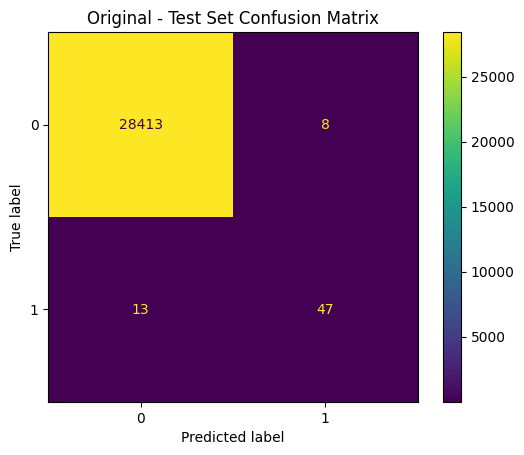

SMOTE - 交叉驗證平均 F1 分數: 0.4377
SMOTE - 測試集 F1 分數: 0.4873


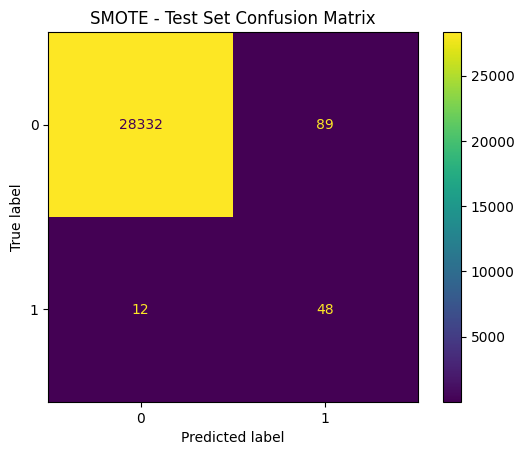

SMOTE - Test PR AUC = 0.3066

Borderline-SMOTE1 - 交叉驗證平均 F1 分數: 0.6466
Borderline-SMOTE1 - 測試集 F1 分數: 0.6822


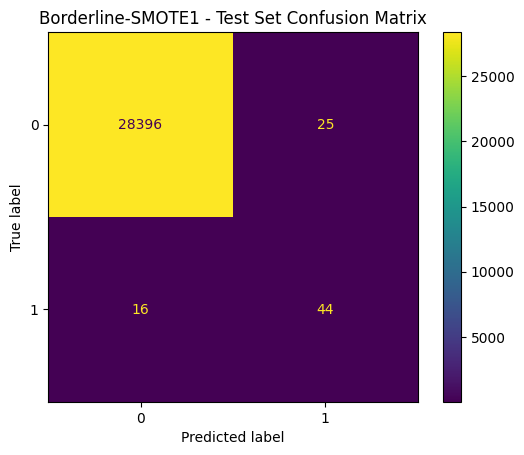

Borderline-SMOTE1 - Test PR AUC = 0.4818

Borderline-SMOTE2 - 交叉驗證平均 F1 分數: 0.6494
Borderline-SMOTE2 - 測試集 F1 分數: 0.7023


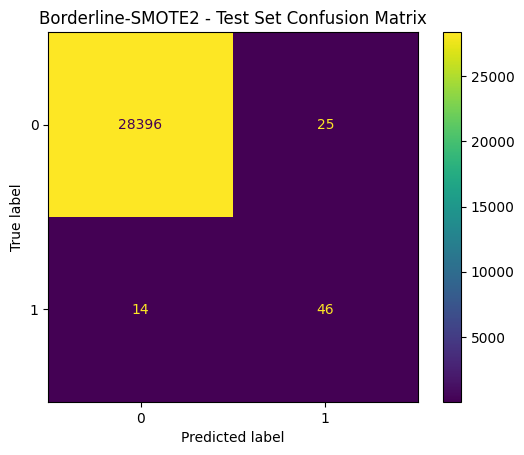

Borderline-SMOTE2 - Test PR AUC = 0.4910

ADASYN (sampling_strategy=0.3) - 交叉驗證平均 F1 分數: 0.4072
ADASYN (sampling_strategy=0.3) - 測試集 F1 分數: 0.4519


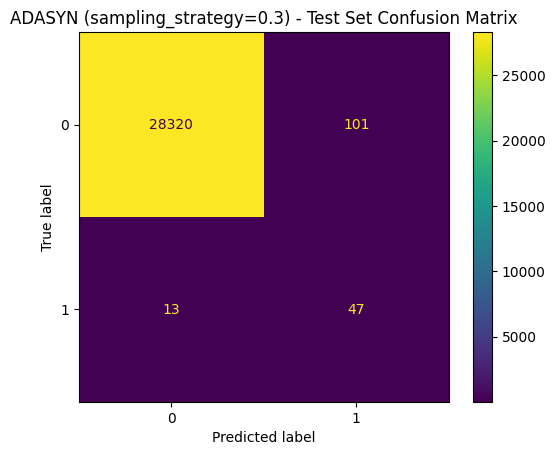

ADASYN (sampling_strategy=0.3) - Test PR AUC = 0.3429

Edited Nearest Neighbours (ENN) - 交叉驗證平均 F1 分數: 0.7759
Edited Nearest Neighbours (ENN) - 測試集 F1 分數: 0.8033


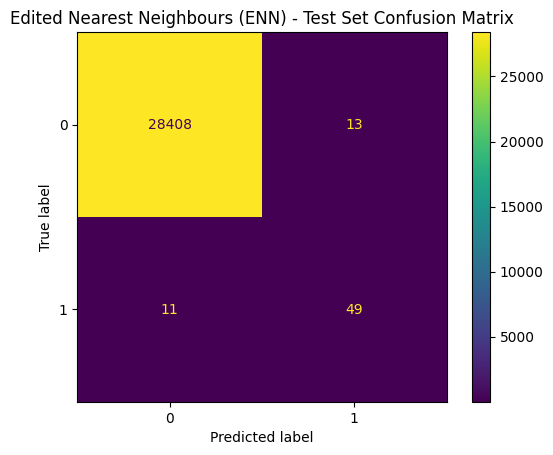

Edited Nearest Neighbours (ENN) - Test PR AUC = 0.7342

SMOTE + ENN - 交叉驗證平均 F1 分數: 0.4377
SMOTE + ENN - 測試集 F1 分數: 0.4873


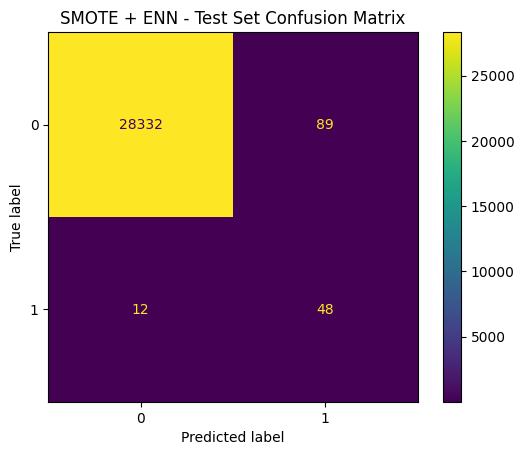

SMOTE + ENN - Test PR AUC = 0.3066



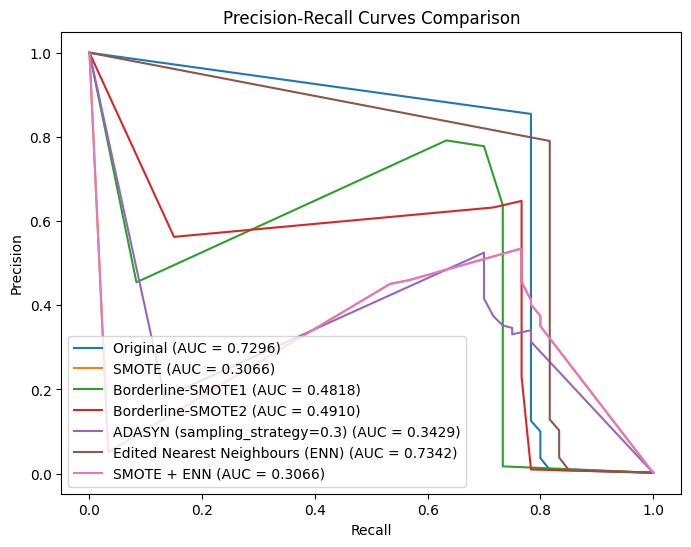

In [4]:
# =========================
# 第 1 部分：原始模型（含 GridSearchCV）
# =========================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=706
)

param_grid = {'max_depth': [20]} 

base_model = DecisionTreeClassifier(random_state=706)

kf = KFold(n_splits=5, shuffle=True, random_state=706)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=kf,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)


print(f"最佳參數: {grid_search.best_params_}")
print(f"最佳交叉驗 F1 分數: {grid_search.best_score_:.4f}")


final_model = grid_search.best_estimator_

y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]  
test_f1_score = f1_score(y_test, y_test_pred)
print(f"模型在 Test 集上的 F1 分數: {test_f1_score:.4f}")

# 計算 Test 集上的 PR Curve 以及 AUC
precision_orig, recall_orig, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc_orig = auc(recall_orig, precision_orig)
print(f"Original - Test PR AUC = {pr_auc_orig:.4f}")

# 繪製 Test 集的混淆矩陣
test_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_cm, display_labels=final_model.classes_).plot()
plt.title("Original - Test Set Confusion Matrix")
plt.show()

# =========================
# 第 2 部分：定義統一的評估函式，用於各種 resampling 方法
# =========================

def evaluate_resampling_method(X_train, y_train, X_test, y_test, model, sampler, method_name, kf):
    """
    使用給定的 sampler (可以是 SMOTE、ADASYN、ENN... 或多段串接) 來進行交叉驗證，
    訓練 model 並在測試集上得到最終結果。
    返回測試集上計算出的 precision, recall, 以供畫 PR 曲線。
    """
    fold_f1_scores = []

    # 在交叉驗證中逐折處理
    for train_idx, val_idx in kf.split(X_train):
        # 切分訓練集和驗證集
        X_train_fold = X_train.iloc[train_idx]
        X_val_fold   = X_train.iloc[val_idx]
        y_train_fold = y_train.iloc[train_idx]
        y_val_fold   = y_train.iloc[val_idx]

        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_fold, y_train_fold)

        # 使用模型進行訓練
        model.fit(X_train_resampled, y_train_resampled)

        # 在驗證集上進行評估
        y_val_pred = model.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_val_pred)
        fold_f1_scores.append(f1)

    # 交叉驗證平均 F1
    mean_f1_score = np.mean(fold_f1_scores)
    print(f"{method_name} - 交叉驗證平均 F1 分數: {mean_f1_score:.4f}")

    # 最後在整個 Training Set 上重取樣，訓練最終模型
    X_train_resampled_all, y_train_resampled_all = sampler.fit_resample(X_train, y_train)
    model.fit(X_train_resampled_all, y_train_resampled_all)

    # 在測試集上預測
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    test_f1 = f1_score(y_test, y_test_pred)
    print(f"{method_name} - 測試集 F1 分數: {test_f1:.4f}")

    # 畫混淆矩陣
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()
    plt.title(f"{method_name} - Test Set Confusion Matrix")
    plt.show()

    # 計算 PR Curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_auc = auc(recall, precision)
    print(f"{method_name} - Test PR AUC = {pr_auc:.4f}\n")

    return precision, recall, pr_auc


# =========================
# 第 3 部分：分別對各種 oversampling/undersampling 方法進行評估
# =========================
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)

# (1) SMOTE
smote = SMOTE(random_state=706)

# (2) BorderlineSMOTE - kind='borderline-1'
smote1 = BorderlineSMOTE(kind='borderline-1', random_state=706)

# (3) BorderlineSMOTE - kind='borderline-2'
smote2 = BorderlineSMOTE(kind='borderline-2', random_state=706)

# (4) ADASYN
adasyn = ADASYN(sampling_strategy=0.3, random_state=706)

# (5) ENN (單獨)
enn = EditedNearestNeighbours()

# (6) SMOTE 再 ENN（你特別指出要先 SMOTE 再 ENN）
class SMOTEThenENN:
    def __init__(self, smote, enn):
        self.smote = smote
        self.enn = enn
    
    def fit_resample(self, X, y):
        X_res, y_res = self.smote.fit_resample(X, y)
        X_res, y_res = self.enn.fit_resample(X_res, y_res)
        return X_res, y_res

smote_then_enn = SMOTEThenENN(smote=SMOTE(random_state=706), enn=EditedNearestNeighbours())

pr_results = []

# Original
pr_results.append(("Original", precision_orig, recall_orig, auc(recall_orig, precision_orig)))

# SMOTE
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, smote, "SMOTE", kf
)
pr_results.append(("SMOTE", p, r, pr_auc))

# Borderline-SMOTE1
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, smote1, "Borderline-SMOTE1", kf
)
pr_results.append(("Borderline-SMOTE1", p, r, pr_auc))

# Borderline-SMOTE2
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, smote2, "Borderline-SMOTE2", kf
)
pr_results.append(("Borderline-SMOTE2", p, r, pr_auc))

# ADASYN
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, adasyn, "ADASYN (sampling_strategy=0.3)", kf
)
pr_results.append(("ADASYN (sampling_strategy=0.3)", p, r, pr_auc))

# ENN
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, enn, "Edited Nearest Neighbours (ENN)", kf
)
pr_results.append(("Edited Nearest Neighbours (ENN)", p, r, pr_auc))

# SMOTE -> ENN
model_for_resampling = DecisionTreeClassifier(random_state=706, max_depth=20)
p, r, pr_auc = evaluate_resampling_method(
    X_train, y_train, X_test, y_test,
    model_for_resampling, smote_then_enn, "SMOTE + ENN", kf
)
pr_results.append(("SMOTE + ENN", p, r, pr_auc))

# =========================
# 第 4 部分：將所有 PR Curve 畫在同一張圖中比較
# =========================
plt.figure(figsize=(8, 6))
for method_name, p, r, area in pr_results:
    plt.plot(r, p, label=f"{method_name} (AUC = {area:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves Comparison")
plt.legend(loc="lower left")
plt.show()

Using device: cuda
Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6409/6409 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9975 - loss: 0.0104 - val_accuracy: 0.9992 - val_loss: 0.0109
Epoch 2/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9992 - val_loss: 0.0074
Epoch 3/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0049
Epoch 4/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 5/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 6/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 7/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0060
Epoch 8/50
6409/6409 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0030 - val

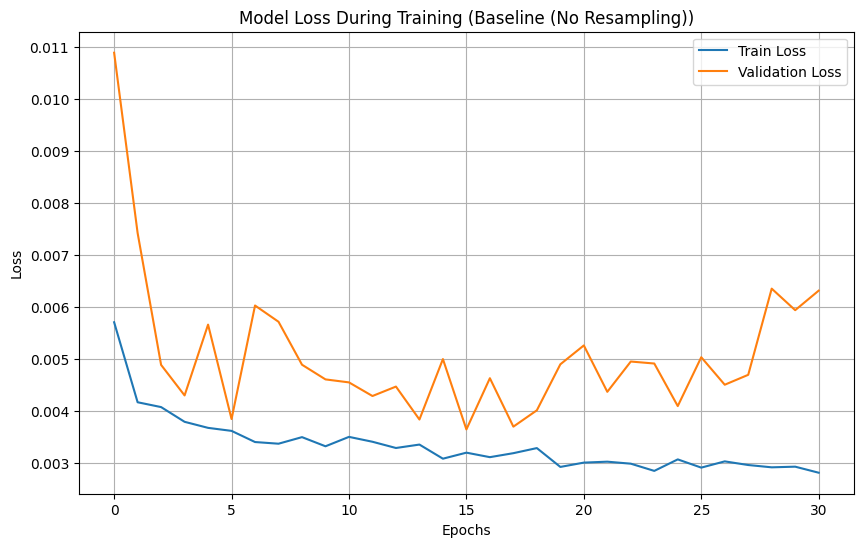

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step
驗證集 F1 分數 (Baseline (No Resampling)): 0.8137
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step
測試集 F1 分數 (Baseline (No Resampling)): 0.8319


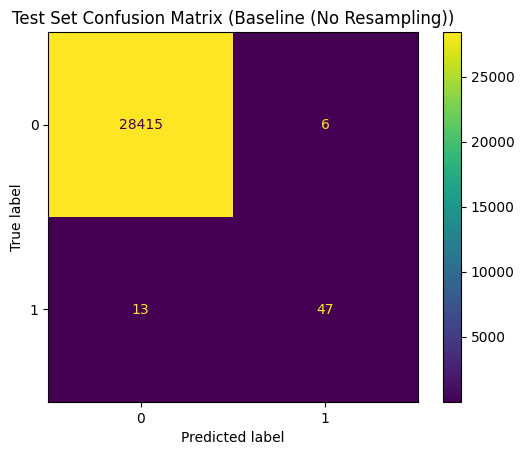

Baseline (No Resampling) - Test PR AUC = 0.8523

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9560 - loss: 0.1119 - val_accuracy: 0.9815 - val_loss: 0.0578
Epoch 2/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9762 - loss: 0.0647 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 3/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9817 - loss: 0.0535 - val_accuracy: 0.9846 - val_loss: 0.0527
Epoch 4/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9836 - loss: 0.0474 - val_accuracy: 0.9914 - val_loss: 0.0312
Epoch 5/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.9929 - val_loss: 0.0343
Epoch 6/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9855 - loss: 0.0445 - val_accuracy: 0.9928 - val_loss: 0.0295
Epoch 7/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9864 - loss: 0.0419 - val_accuracy: 0.9890 - val_loss: 0.0355
Epoch 8/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9866 - lo

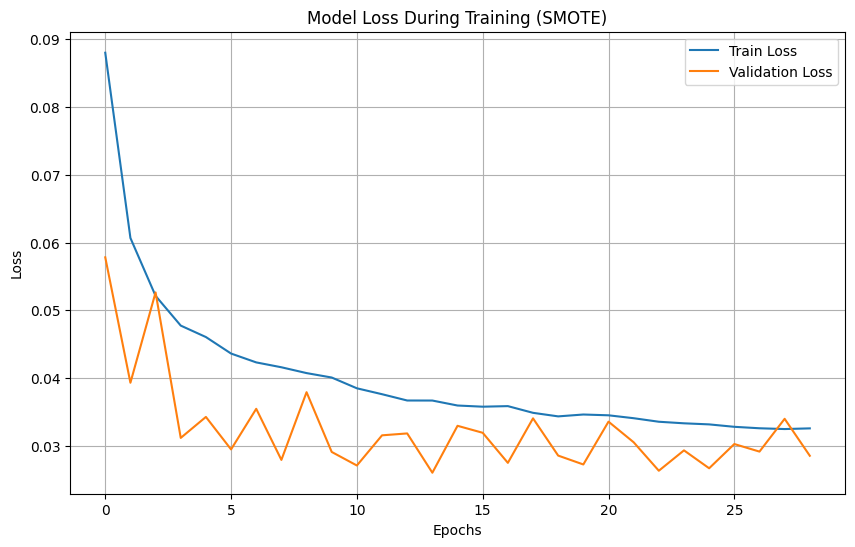

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
驗證集 F1 分數 (SMOTE): 0.3417
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
測試集 F1 分數 (SMOTE): 0.3566


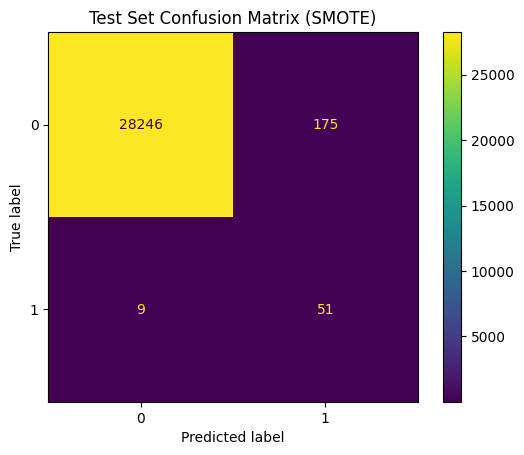

SMOTE - Test PR AUC = 0.8364



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9922 - loss: 0.0281 - val_accuracy: 0.9978 - val_loss: 0.0147
Epoch 2/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9971 - loss: 0.0120 - val_accuracy: 0.9983 - val_loss: 0.0106
Epoch 3/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9976 - loss: 0.0101 - val_accuracy: 0.9974 - val_loss: 0.0122
Epoch 4/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 0.9976 - val_loss: 0.0112
Epoch 5/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9979 - loss: 0.0091 - val_accuracy: 0.9976 - val_loss: 0.0136
Epoch 6/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9982 - loss: 0.0081 - val_accuracy: 0.9981 - val_loss: 0.0114
Epoch 7/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9984 - loss: 0.0075 - val_accuracy: 0.9982 - val_loss: 0.0108
Epoch 8/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

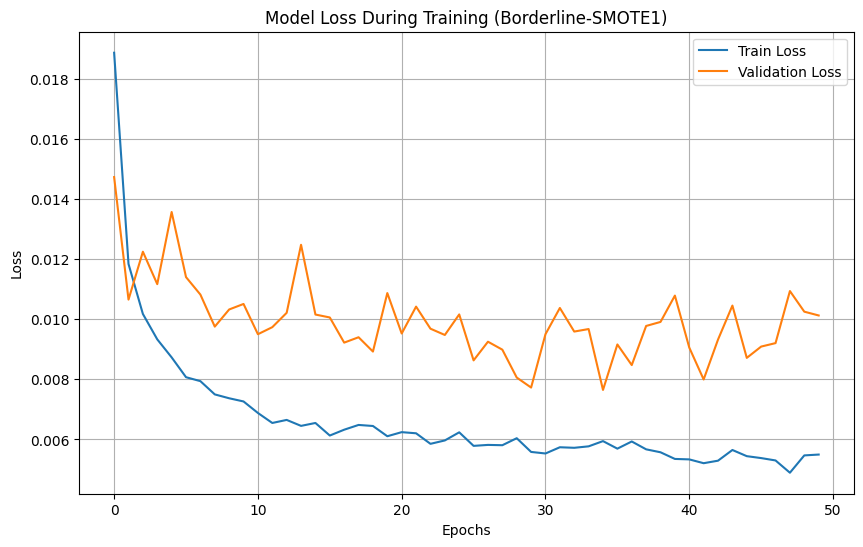

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step
驗證集 F1 分數 (Borderline-SMOTE1): 0.7085
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step
測試集 F1 分數 (Borderline-SMOTE1): 0.7717


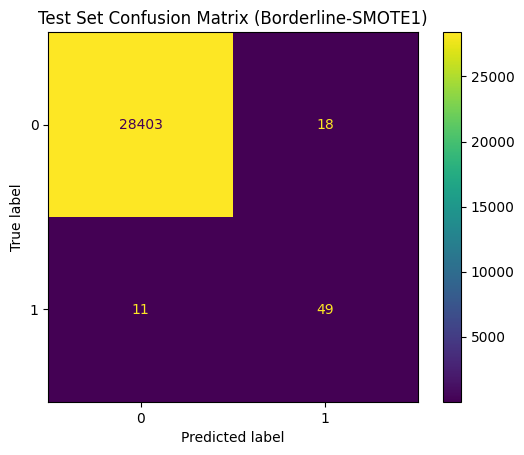

Borderline-SMOTE1 - Test PR AUC = 0.8272



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9937 - loss: 0.0237 - val_accuracy: 0.9984 - val_loss: 0.0103
Epoch 2/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9978 - loss: 0.0099 - val_accuracy: 0.9987 - val_loss: 0.0097
Epoch 3/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9984 - loss: 0.0079 - val_accuracy: 0.9984 - val_loss: 0.0105
Epoch 4/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9988 - val_loss: 0.0115
Epoch 5/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.9989 - val_loss: 0.0094
Epoch 6/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9990 - val_loss: 0.0096
Epoch 7/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9990 - val_loss: 0.0094
Epoch 8/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 

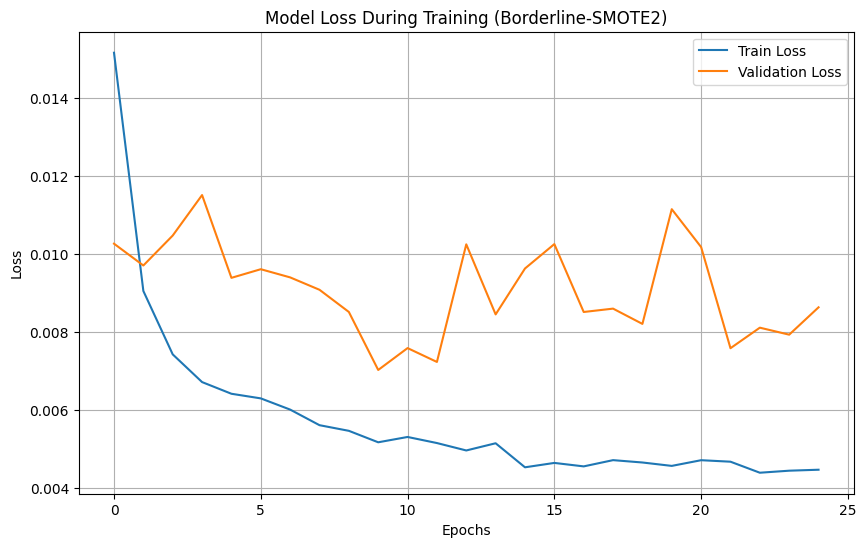

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step
驗證集 F1 分數 (Borderline-SMOTE2): 0.7748
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step
測試集 F1 分數 (Borderline-SMOTE2): 0.7805


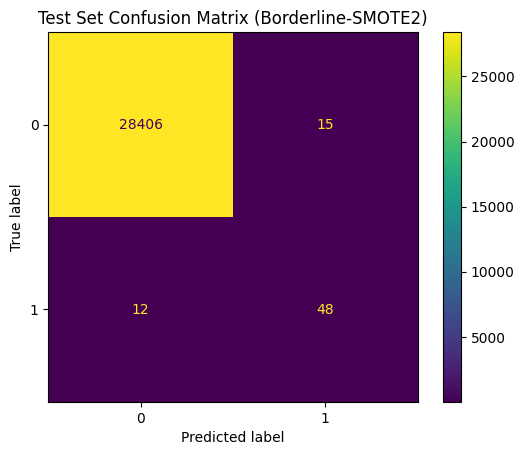

Borderline-SMOTE2 - Test PR AUC = 0.8311

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12796/12796 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9550 - loss: 0.1221 - val_accuracy: 0.9812 - val_loss: 0.0563
Epoch 2/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9816 - loss: 0.0586 - val_accuracy: 0.9867 - val_loss: 0.0442
Epoch 3/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9851 - loss: 0.0507 - val_accuracy: 0.9908 - val_loss: 0.0341
Epoch 4/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9898 - val_loss: 0.0379
Epoch 5/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9879 - loss: 0.0402 - val_accuracy: 0.9901 - val_loss: 0.0352
Epoch 6/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9886 - loss: 0.0386 - val_accuracy: 0.9906 - val_loss: 0.0339
Epoch 7/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9887 - loss: 0.0377 - val_accuracy: 0.9927 - val_loss: 0.0278
Epoch 8/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9895 - lo

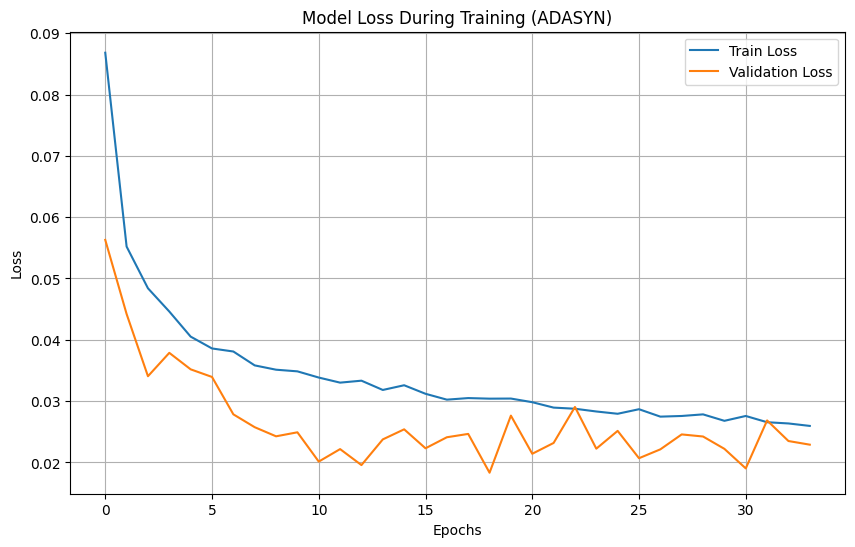

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step
驗證集 F1 分數 (ADASYN): 0.3982
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step
測試集 F1 分數 (ADASYN): 0.4237


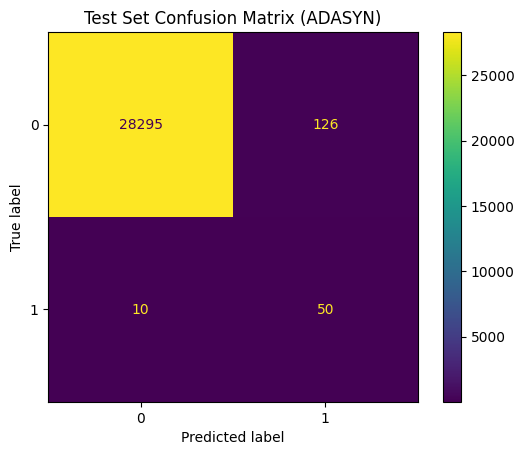

ADASYN - Test PR AUC = 0.7952

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6405/6405 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9951 - loss: 0.0132 - val_accuracy: 0.9992 - val_loss: 0.0104
Epoch 2/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0117
Epoch 3/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0107
Epoch 4/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0099
Epoch 5/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9995 - loss: 0.0033 - val_accuracy: 0.9992 - val_loss: 0.0174
Epoch 6/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0097
Epoch 7/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9992 - val_loss: 0.0154
Epoch 8/50
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0029 - val_a

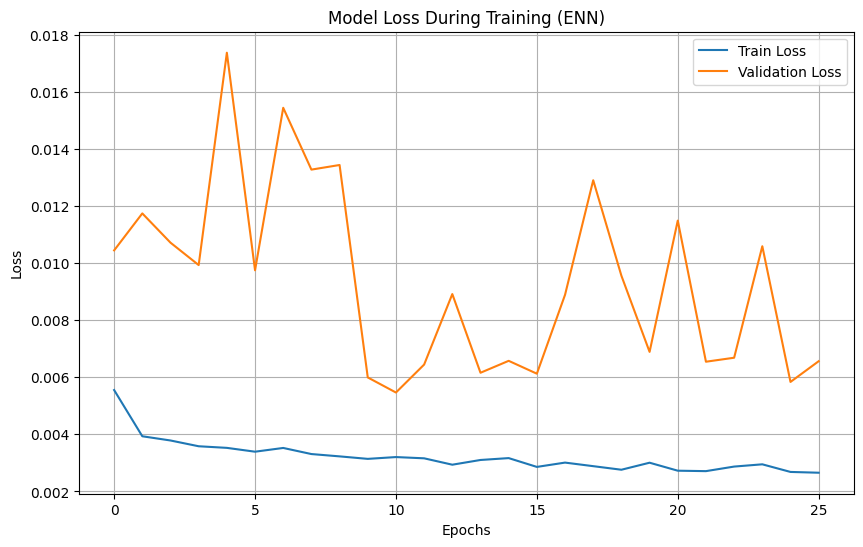

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step
驗證集 F1 分數 (ENN): 0.7834
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
測試集 F1 分數 (ENN): 0.7812


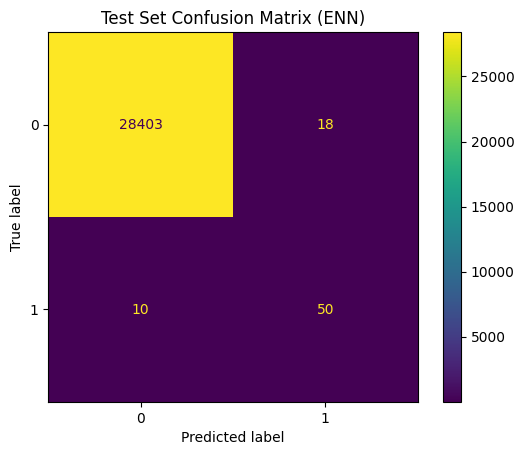

ENN - Test PR AUC = 0.8544

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12796/12796 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9584 - loss: 0.1082 - val_accuracy: 0.9859 - val_loss: 0.0503
Epoch 2/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9786 - loss: 0.0594 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 3/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9822 - loss: 0.0511 - val_accuracy: 0.9934 - val_loss: 0.0244
Epoch 4/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9841 - loss: 0.0475 - val_accuracy: 0.9930 - val_loss: 0.0258
Epoch 5/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9850 - loss: 0.0441 - val_accuracy: 0.9919 - val_loss: 0.0329
Epoch 6/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9858 - loss: 0.0430 - val_accuracy: 0.9930 - val_loss: 0.0293
Epoch 7/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9931 - val_loss: 0.0261
Epoch 8/50
12796/12796 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9875 - lo

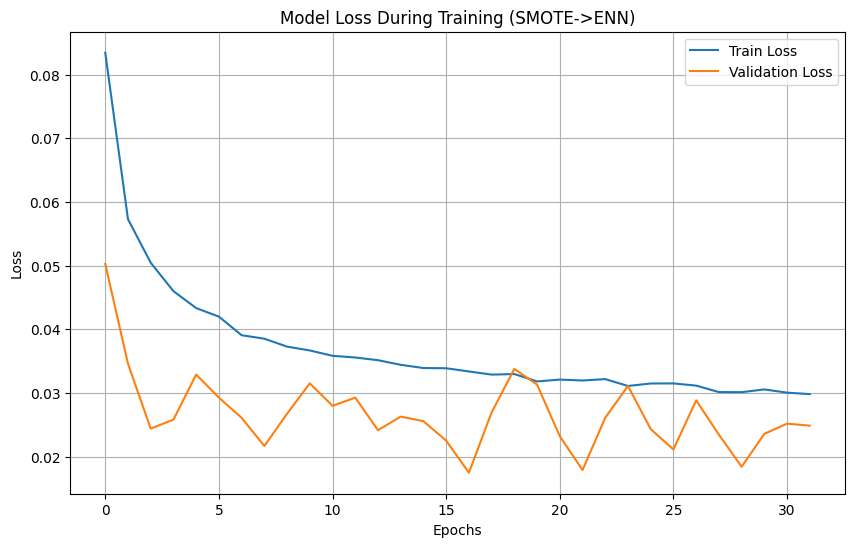

1603/1603 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step
驗證集 F1 分數 (SMOTE->ENN): 0.4027
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step
測試集 F1 分數 (SMOTE->ENN): 0.4355


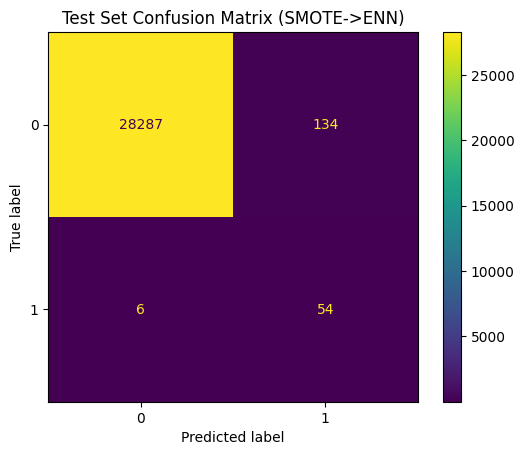

SMOTE->ENN - Test PR AUC = 0.8677



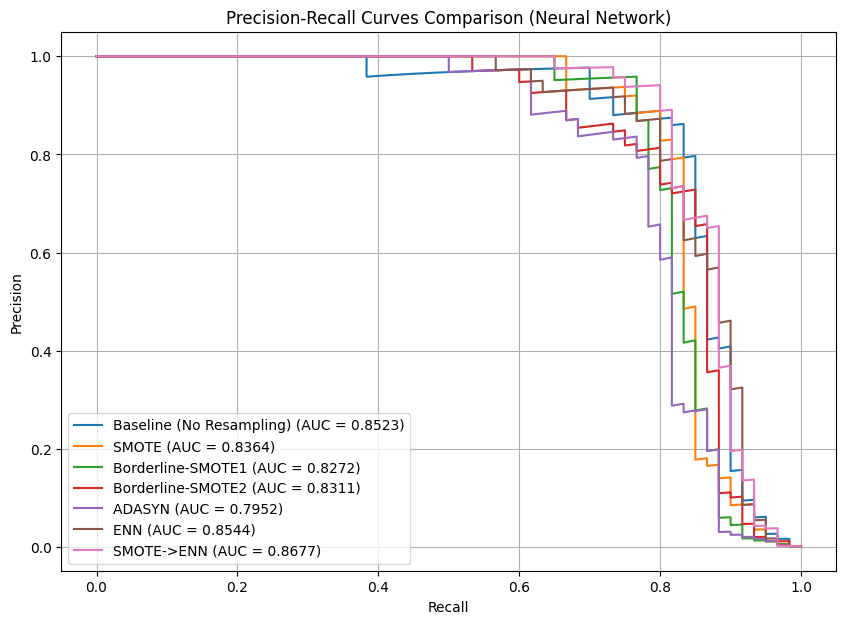

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# =========================
# Step 1: 將數據切分為 Train+Validation 和 Test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=706
)

# Step 2: 再將 Train+Validation 拆分
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=706
)

# =========================
# Step 3: 定義神經網絡模型
# =========================
def create_nn_model(input_dim):
    model = Sequential()
    
    # 第一層
    model.add(Dense(64, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    # 第二層
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    # 輸出層 (二分類，softmax 2 輸出)
    model.add(Dense(2, activation='softmax'))
    
    return model

# =========================
# Step 4: 定義各種采樣方法
# =========================

# Baseline
def no_resampling(X, y):
    return X, y

# SMOTE
def smote_resampling(X, y):
    return SMOTE(random_state=706).fit_resample(X, y)

# BorderlineSMOTE1
def smote1_resampling(X, y):
    smote1 = BorderlineSMOTE(kind='borderline-1', random_state=706)
    return smote1.fit_resample(X, y)

# BorderlineSMOTE2
def smote2_resampling(X, y):
    smote2 = BorderlineSMOTE(kind='borderline-2', random_state=706)
    return smote2.fit_resample(X, y)

# ADASYN
def adasyn_resampling(X, y):
    return ADASYN(random_state=706).fit_resample(X, y)

# ENN
def enn_resampling(X, y):
    enn = EditedNearestNeighbours(n_neighbors=3)
    return enn.fit_resample(X, y)

# SMOTE -> ENN
def smote_then_enn_resampling(X, y):
    X_smote, y_smote = SMOTE(random_state=706).fit_resample(X, y)
    enn = EditedNearestNeighbours(n_neighbors=3)
    return enn.fit_resample(X_smote, y_smote)


# =========================
# Step 5: 統一的訓練與評估函式
# =========================
def train_and_evaluate_nn(
    sampler_func,
    method_name,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test
):
    # ---------- 1) 資料前處理 (重取樣) ----------
    X_resampled, y_resampled = sampler_func(X_train, y_train)

    # ---------- 2) 建立模型、編譯 ----------
    model = create_nn_model(input_dim=X_resampled.shape[1])
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # ---------- 3) EarlyStopping ----------
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # ---------- 4) 訓練 ----------
    history = model.fit(
        X_resampled,
        y_resampled,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping]
    )

    # ---------- 5) 繪製訓練過程 (Loss) ----------
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss During Training ({method_name})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # ---------- 6) 在驗證集上的 F1 分數 ----------
    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    val_f1 = f1_score(y_val, y_val_pred_classes)
    print(f"驗證集 F1 分數 ({method_name}): {val_f1:.4f}")

    # ---------- 7) 在測試集上進行預測 ----------
    y_test_pred = model.predict(X_test)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    
    # 計算測試集 F1 分數
    test_f1 = f1_score(y_test, y_test_pred_classes)
    print(f"測試集 F1 分數 ({method_name}): {test_f1:.4f}")

    # ---------- 8) 繪製混淆矩陣 ----------
    test_cm = confusion_matrix(y_test, y_test_pred_classes)
    ConfusionMatrixDisplay(test_cm, display_labels=[0, 1]).plot()
    plt.title(f"Test Set Confusion Matrix ({method_name})")
    plt.show()

    # ---------- 9) 計算與繪製 PR Curve ----------
    y_test_prob = y_test_pred[:, 1]  # 取出正類的預測概率
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_auc = auc(recall, precision)
    
    print(f"{method_name} - Test PR AUC = {pr_auc:.4f}\n")

    return precision, recall, pr_auc


# =========================
# Step 6: 依序跑所有方法，並收集結果
# =========================

pr_results = []

# Baseline - 不做任何重取樣
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=no_resampling,
    method_name="Baseline (No Resampling)",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("Baseline (No Resampling)", p, r, pr_auc))

# SMOTE
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=smote_resampling,
    method_name="SMOTE",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("SMOTE", p, r, pr_auc))

# Borderline-SMOTE1
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=smote1_resampling,
    method_name="Borderline-SMOTE1",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("Borderline-SMOTE1", p, r, pr_auc))

# Borderline-SMOTE2
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=smote2_resampling,
    method_name="Borderline-SMOTE2",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("Borderline-SMOTE2", p, r, pr_auc))

# ADASYN
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=adasyn_resampling,
    method_name="ADASYN",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("ADASYN", p, r, pr_auc))

# ENN
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=enn_resampling,
    method_name="ENN",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("ENN", p, r, pr_auc))

# 先 SMOTE -> 再 ENN
p, r, pr_auc = train_and_evaluate_nn(
    sampler_func=smote_then_enn_resampling,
    method_name="SMOTE->ENN",
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test
)
pr_results.append(("SMOTE->ENN", p, r, pr_auc))

# =========================
# Step 7: 統一繪製所有方法的 PR Curve
# =========================
plt.figure(figsize=(10, 7))
for method_name, precision, recall, area in pr_results:
    plt.plot(recall, precision, label=f"{method_name} (AUC = {area:.4f})")

plt.title("Precision-Recall Curves Comparison (Neural Network)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid()
plt.show()